In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation metrics

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#Read dataset using pandas
df = pd.read_csv('Dataset/beach-weather-stations-automated-sensors.csv')

In [3]:
#dataset description
df.describe()

,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
count,59066.000000,38843.000000,59141.000000,38843.000000,59141.000000,38843.000000,38843.000000,59141.000000,59141.000000,59141.000000,58995.000000,59141.000000,38843.000000,59141.000000
mean,13.282062,10.643001,69.464517,0.187591,0.175327,185.445529,4.651932,178.980132,2.969908,4.484584,993.718263,108.490421,186.236877,13.055144
std,9.945331,8.965170,15.714691,1.962149,1.300946,231.579782,16.168542,108.124898,6.138399,6.451704,7.044515,211.497272,176.452547,1.485712
min,-19.890000,-20.100000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,964.400000,-6.000000,0.000000,11.600000
25%,5.500000,4.000000,59.000000,0.000000,0.000000,14.900000,0.000000,86.000000,1.400000,2.400000,989.500000,0.000000,1.000000,11.900000
50%,14.900000,12.100000,71.000000,0.000000,0.000000,69.800000,0.000000,196.000000,2.500000,3.800000,993.900000,3.000000,353.000000,12.100000
75%,21.500000,18.100000,82.000000,0.000000,0.000000,279.500000,0.000000,271.000000,4.000000,5.900000,998.100000,96.000000,354.000000,15.100000
max,34.100000,28.400000,100.000000,183.600000,63.420000,1056.100000,70.000000,359.000000,999.900000,999.900000,1019.500000,1277.000000,359.000000,15.300000


In [4]:
df.head()

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
0,Oak Street Weather Station,05/22/2015 03:00:00 PM,NaN,7.0,55.0,0.0,0.0,1.4,0.0,63.0,1.9,2.8,NaN,780.0,322.0,12.0,05/22/2015 3:00 PM,OakStreetWeatherStation201505221500
1,Oak Street Weather Station,05/22/2015 05:00:00 PM,NaN,6.3,56.0,0.0,0.0,1.4,0.0,124.0,1.5,2.3,NaN,180.0,322.0,12.1,05/22/2015 5:00 PM,OakStreetWeatherStation201505221700
2,Oak Street Weather Station,05/22/2015 06:00:00 PM,NaN,6.5,54.0,0.0,0.0,1.4,0.0,156.0,1.9,3.4,NaN,127.0,322.0,12.1,05/22/2015 6:00 PM,OakStreetWeatherStation201505221800
3,Oak Street Weather Station,05/22/2015 07:00:00 PM,NaN,6.3,53.0,0.0,0.0,1.4,0.0,150.0,1.4,4.5,NaN,67.0,322.0,12.1,05/22/2015 7:00 PM,OakStreetWeatherStation201505221900
4,Oak Street Weather Station,05/22/2015 08:00:00 PM,NaN,6.4,52.0,0.0,0.0,1.4,0.0,155.0,1.1,2.3,NaN,10.0,322.0,12.0,05/22/2015 8:00 PM,OakStreetWeatherStation201505222000


In [5]:
#Remove unwanted features
print(df.columns)
df.drop(columns=['Station Name','Measurement Timestamp','Battery Life', 'Measurement Timestamp Label','Measurement ID','Rain Intensity', 'Total Rain'], inplace=True)

Index(['Station Name', 'Measurement Timestamp', 'Air Temperature',
       'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain',
       'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed',
       'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation',
       'Heading', 'Battery Life', 'Measurement Timestamp Label',
       'Measurement ID'],
      dtype='object')


In [6]:
#Remove null from the Dataframe
df = df.dropna()

Index(['Air Temperature', 'Wet Bulb Temperature', 'Humidity', 'Interval Rain',
       'Precipitation Type', 'Wind Direction', 'Wind Speed',
       'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation',
       'Heading'],
      dtype='object')


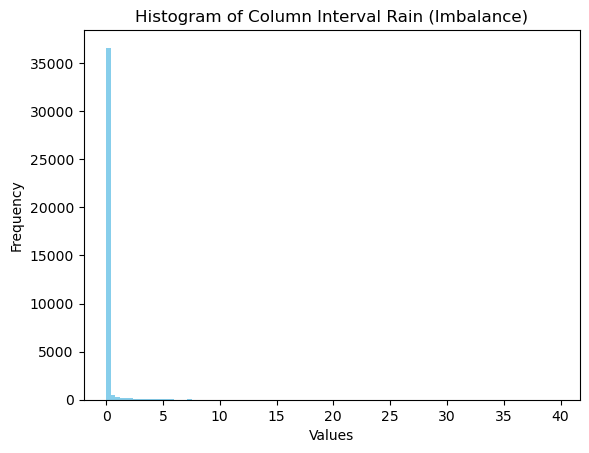

In [7]:
import matplotlib.pyplot as plt

print(df.columns)
# Plot a histogram of column 'Interval Rain'
plt.hist(df['Interval Rain'], bins=100, color='skyblue')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column Interval Rain (Imbalance)')


plt.show()

Index(['Air Temperature', 'Wet Bulb Temperature', 'Humidity',
       'Precipitation Type', 'Wind Direction', 'Wind Speed',
       'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation',
       'Heading', 'Rain_Likelihood'],
      dtype='object')


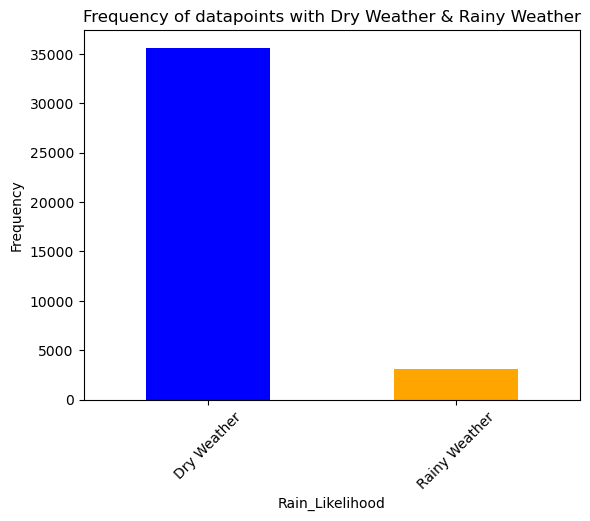

In [8]:
# Add a new column "Rain_Likelihood" based on the condition
df['Rain_Likelihood'] = np.where(df["Interval Rain"] > 0, 1, 0)
df = df.drop('Interval Rain', axis=1)

print(df.columns)

# Count the occurrences of 0s and 1s
counts = df['Rain_Likelihood'].value_counts()

# Create a bar plot
counts.plot(kind='bar', color=['blue', 'orange'])

# Add titles and labels
plt.title('Frequency of datapoints with Dry Weather & Rainy Weather')
plt.xticks([0,1],['Dry Weather','Rainy Weather'], rotation=45)
plt.ylabel('Frequency')

plt.show()

In [9]:
df.count()

Air Temperature         38768
Wet Bulb Temperature    38768
Humidity                38768
Precipitation Type      38768
Wind Direction          38768
Wind Speed              38768
Maximum Wind Speed      38768
Barometric Pressure     38768
Solar Radiation         38768
Heading                 38768
Rain_Likelihood         38768
dtype: int64

In [10]:
df.describe()

,Air Temperature,Wet Bulb Temperature,Humidity,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Rain_Likelihood
count,38768.000000,38768.000000,38768.000000,38768.000000,38768.000000,38768.000000,38768.000000,38768.000000,38768.000000,38768.000000,38768.000000
mean,13.611832,10.634356,70.968479,4.654741,171.104132,2.872106,4.911141,993.919366,141.188300,185.999149,0.081124
std,9.936154,8.969845,15.948284,16.173181,111.489454,7.434584,7.762684,7.037488,233.306953,176.518453,0.273028
min,-19.500000,-20.100000,17.000000,0.000000,0.000000,0.000000,0.000000,965.100000,-6.000000,0.000000,0.000000
25%,5.800000,4.000000,60.000000,0.000000,71.000000,1.300000,2.600000,989.800000,2.000000,1.000000,0.000000
50%,15.300000,12.100000,72.000000,0.000000,180.000000,2.300000,4.200000,994.100000,7.000000,353.000000,0.000000
75%,21.800000,18.100000,83.000000,0.000000,270.000000,3.800000,6.500000,998.300000,181.000000,354.000000,0.000000
max,34.100000,28.400000,100.000000,70.000000,359.000000,999.900000,999.900000,1019.500000,1277.000000,359.000000,1.000000


In [11]:
# Binary Classification of "Rain_Likelihood" 
df['Rain_Likelihood'].head()

61    1
62    0
64    0
69    1
70    1
Name: Rain_Likelihood, dtype: int32

In [12]:
features = list(df.columns)
features.remove("Rain_Likelihood")
label = "Rain_Likelihood"

print("Features ", str(features)[1:-1])
print("Label: ", label)

Features  'Air Temperature', 'Wet Bulb Temperature', 'Humidity', 'Precipitation Type', 'Wind Direction', 'Wind Speed', 'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation', 'Heading'
Label:  Rain_Likelihood


Text(0.5, 1.0, "'Precipitation Type vs  Rain Likelihood")

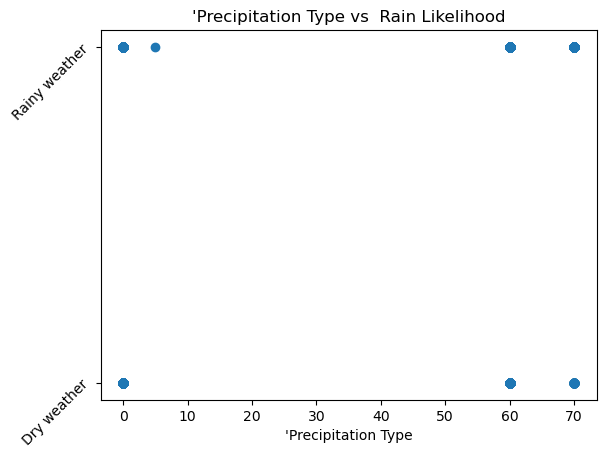

In [13]:
# visualize the distribution of dry & rainy weather over the change in Precipitation Type
# visualize Precipitation Type vs Rain_Likelihood

plt.scatter(df['Precipitation Type'],df['Rain_Likelihood']);
plt.xlabel("'Precipitation Type")
plt.yticks([0,1], ['Dry weather','Rainy weather'], rotation=45)
plt.title("'Precipitation Type vs  Rain Likelihood")


# The same can be used to visualize all the features' relationship with the likelihood of rain!

In [14]:
df.columns

Index(['Air Temperature', 'Wet Bulb Temperature', 'Humidity',
       'Precipitation Type', 'Wind Direction', 'Wind Speed',
       'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation',
       'Heading', 'Rain_Likelihood'],
      dtype='object')

In [15]:
#Features & Labels
X = df[features].to_numpy()
y = df[label].to_numpy()

In [16]:
print("Features matrix: ",X.shape)
print("Label Vector: ", y.shape)

Features matrix:  (38768, 10)
Label Vector:  (38768,)


In [17]:
#applying Smote to minimize imbalance
from imblearn.over_sampling import SMOTE

# Define the SMOTE object
smote = SMOTE(random_state=91)

# Fit and resample the training data
X_train_res, y_train_res = smote.fit_resample(X, y)

Text(0, 0.5, 'Frequency')

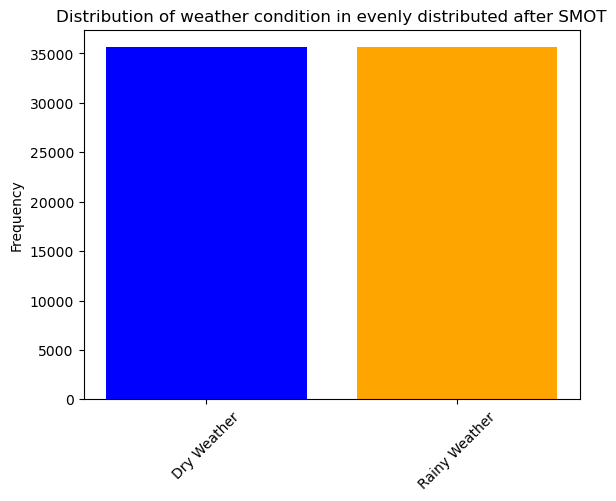

In [18]:
# Count occurrences of unique values (0s and 1s)
unique, counts = np.unique(y_train_res, return_counts=True)

# Create a bar plot
plt.bar(unique, counts, color=['blue', 'orange'])

# Add titles and labels
plt.title('Distribution of weather condition in evenly distributed after SMOT')
plt.xticks([0,1],['Dry Weather','Rainy Weather'], rotation=45)
plt.ylabel('Frequency')

In [19]:
from sklearn.model_selection import train_test_split

# Assuming X is the feature set and y is the target variable
print(X_train_res.shape)
print(y_train_res.shape)


(71246, 10)
(71246,)


In [20]:
data = pd.DataFrame(X_train_res)
data['target'] = y_train_res

data_sorted = data.sort_values(by='target').reset_index(drop=True)

X_sorted = data_sorted.drop('target', axis=1).values.reshape(-1, 10)
y_sorted = data_sorted['target'].values

print(X_sorted.shape)
print(y_sorted.shape)

(71246, 10)
(71246,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sorted, y_sorted, test_size=0.2)

In [22]:
print("shape of features (training): ",X_train.shape)
print("shape of label (training): ",y_train.shape)

print("shape of features (testing):" ,X_test.shape)
print("shape of label (testing):" ,y_test.shape)

shape of features (training):  (56996, 10)
shape of label (training):  (56996,)
shape of features (testing): (14250, 10)
shape of label (testing): (14250,)


In [23]:
from sklearn import preprocessing

In [24]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [25]:
X_scaled = scaler.transform(X_train)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report

In [27]:
# Initialize and fit logistic regression model --> Method #1
model1 = LogisticRegression(max_iter=100)
model1.fit(X_scaled, y_train)

LogisticRegression()

In [28]:
# Predict test set
y_pred1 = model1.predict(scaler.transform(X_test))

In [29]:
def generate_confusion_matrix(y_true, y_pred):
    # visualize the confusion matrix
    ax = plt.subplot()
    c_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(c_mat, annot=True, fmt='g', ax=ax)

    ax.set_xlabel('Predicted labels', fontsize=15)
    ax.set_ylabel('True labels', fontsize=15)
    ax.set_title('Confusion Matrix', fontsize=15)


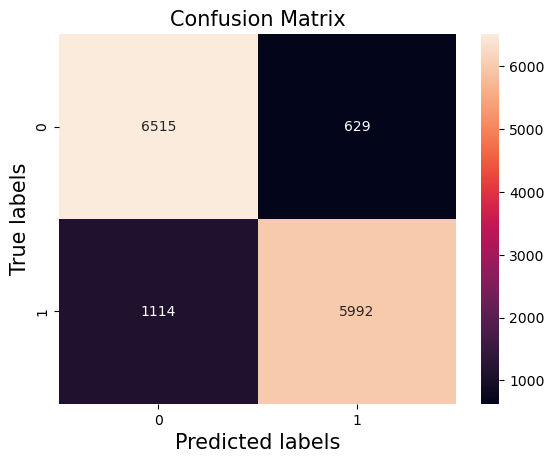

In [30]:
# for logistic regression with loss function: log loss
generate_confusion_matrix(y_test, y_pred1)
plt.show()

In [31]:
accuracy = accuracy_score(y_test, y_pred1)
print("accuracy of classification using logistic regression : ", accuracy*100)

accuracy of classification using logistic regression :  87.76842105263158


In [32]:
#Evaluating loss function: log loss
loss = log_loss(y_test, y_pred1)
print(loss)

4.408707919805698


In [33]:
class_report = classification_report(y_test, y_pred1)
print(class_report)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7144
           1       0.90      0.84      0.87      7106

    accuracy                           0.88     14250
   macro avg       0.88      0.88      0.88     14250
weighted avg       0.88      0.88      0.88     14250



In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model2 = DecisionTreeClassifier(criterion='gini')  # Gini is the default
model2.fit(X_scaled, y_train)

DecisionTreeClassifier()

In [36]:
# Predict test set
y_pred2 = model2.predict(scaler.transform(X_test))

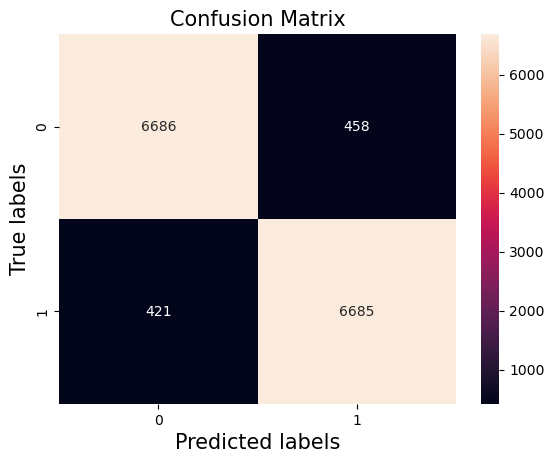

In [37]:
# for decision tree with loss function: gini
generate_confusion_matrix(y_test, y_pred2)
plt.show()

In [38]:
accuracy = accuracy_score(y_test, y_pred2)
print("accuracy of classification using decision tree : ", accuracy*100)

accuracy of classification using decision tree :  93.83157894736843


In [39]:
class_report = classification_report(y_test, y_pred2)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7144
           1       0.94      0.94      0.94      7106

    accuracy                           0.94     14250
   macro avg       0.94      0.94      0.94     14250
weighted avg       0.94      0.94      0.94     14250

